In [2]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [42]:
# Part 1

In [9]:
path = 'Datasets/'
allFiles = glob.glob(path+'states*.csv')
fileLists = []

for filename in allFiles:
    df = pd.read_csv(filename)
    fileLists.append(df);

us_census = pd.concat(fileLists,axis=0,ignore_index='true')

In [10]:
display(us_census.columns)
display(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')

Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object

In [11]:
us_census["Income"] = us_census["Income"].str.extract('(\d*\.\d+|\d+)')
us_census["Income"] = pd.to_numeric(us_census["Income"])

In [12]:
us_census["Men"] = us_census["GenderPop"].str.split('_',n=1,expand=True)[0].str.replace('M','')
us_census["Women"] = us_census["GenderPop"].str.split('_',n=1,expand=True)[1].str.replace('F','')
us_census["Men"] = pd.to_numeric(us_census["Men"])
us_census["Women"] = pd.to_numeric(us_census["Women"])

In [13]:
us_census.duplicated()
us_census = us_census.drop_duplicates()

In [14]:
us_census.loc[:,'Women'][us_census['Women'].isnull()] = us_census.TotalPop[us_census['Women'].isnull()] - us_census.Men[us_census['Women'].isnull()]

<ipython-input-14-037c85c31d99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_census.loc[:,'Women'][us_census['Women'].isnull()] = us_census.TotalPop[us_census['Women'].isnull()] - us_census.Men[us_census['Women'].isnull()]


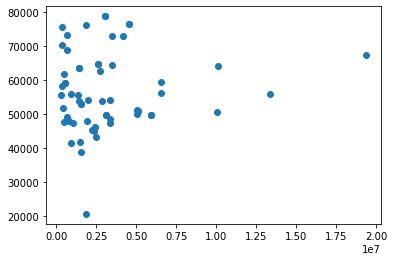

In [15]:
plt.scatter(us_census["Women"],us_census["Income"])
plt.show()

In [16]:
us_census["Hispanic"] = us_census["Hispanic"].str.extract('(\d*\.\d+|\d+)')
us_census["Hispanic"] = pd.to_numeric(us_census["Hispanic"])
us_census["White"] = us_census["White"].str.extract('(\d*\.\d+|\d+)')
us_census["White"] = pd.to_numeric(us_census["White"])
us_census["Black"] = us_census["Black"].str.extract('(\d*\.\d+|\d+)')
us_census["Black"] = pd.to_numeric(us_census["Black"])
us_census["Native"] = us_census["Native"].str.extract('(\d*\.\d+|\d+)')
us_census["Native"] = pd.to_numeric(us_census["Native"])
us_census["Asian"] = us_census["Asian"].str.extract('(\d*\.\d+|\d+)')
us_census["Asian"] = pd.to_numeric(us_census["Asian"])
us_census["Pacific"] = us_census["Pacific"].str.extract('(\d*\.\d+|\d+)')
us_census["Pacific"] = pd.to_numeric(us_census["Pacific"])

In [17]:
us_census.Pacific[us_census.Pacific.isnull()] = us_census.Pacific.mean()

<ipython-input-17-65d6b41c959a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_census.Pacific[us_census.Pacific.isnull()] = us_census.Pacific.mean()


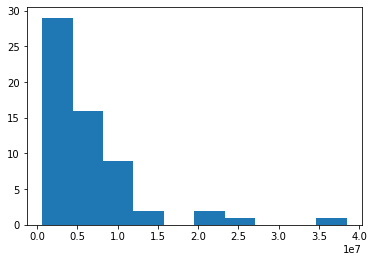

In [18]:
plt.hist(us_census["TotalPop"])
plt.show()

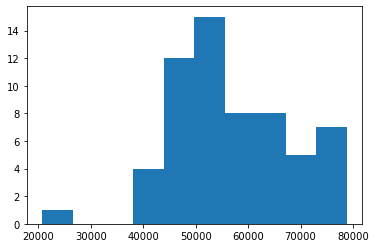

In [19]:
plt.hist(us_census["Income"])
plt.show()

In [20]:
#Part 2

In [24]:
inventory = pd.read_csv('Datasets/inventory.csv')
state_island = inventory.head(10)
display(state_island)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [26]:
product_description = state_island["product_description"]
product_description

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

In [30]:
seed_request = inventory[(inventory["location"]=="Brooklyn") & (inventory["product_type"] == "seeds")]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


In [36]:
inventory["in_stock"] = inventory["quantity"].apply(lambda x: True if x > 0 else False)
inventory

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False
5,Staten Island,garden tools,spade,93,19.99,True
6,Staten Island,pest_control,insect killer,74,12.99,True
7,Staten Island,pest_control,weed killer,8,23.99,True
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False
9,Staten Island,planter,8 inch plastic planter,53,3.99,True


In [39]:
inventory["total_value"] = inventory["quantity"] * inventory["price"]
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00
5,Staten Island,garden tools,spade,93,19.99,True,1859.07
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47


In [40]:
combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)

In [41]:
inventory["full_description"] = inventory.apply(combine_lambda,axis=1)
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter
